In [2]:
# Trabaja con vectores
import numpy as np
# trabaja con dataframes
import pandas as pd
# -Graficar resultados
import seaborn as sn
import matplotlib.pyplot as plt
# Librerías de IA
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [48]:
data = pd.read_excel('BBDD.xlsx')

In [41]:
data.head()

,review_en,review_es,sentiment,sentimiento
0,One of the other reviewers has mentioned that ...,Uno de los otros críticos ha mencionado que de...,positive,positivo
1,A wonderful little production. The filming tec...,Una pequeña pequeña producción.La técnica de f...,positive,positivo
2,I thought this was a wonderful way to spend ti...,Pensé que esta era una manera maravillosa de p...,positive,positivo
3,Basically there's a family where a little boy ...,"Básicamente, hay una familia donde un niño peq...",negative,negativo
4,"Petter Mattei's ""Love in the Time of Money"" is...","El ""amor en el tiempo"" de Petter Mattei es una...",positive,positivo


In [42]:
data

,review_en,review_es,sentiment,sentimiento
0,One of the other reviewers has mentioned that ...,Uno de los otros críticos ha mencionado que de...,positive,positivo
1,A wonderful little production. The filming tec...,Una pequeña pequeña producción.La técnica de f...,positive,positivo
2,I thought this was a wonderful way to spend ti...,Pensé que esta era una manera maravillosa de p...,positive,positivo
3,Basically there's a family where a little boy ...,"Básicamente, hay una familia donde un niño peq...",negative,negativo
4,"Petter Mattei's ""Love in the Time of Money"" is...","El ""amor en el tiempo"" de Petter Mattei es una...",positive,positivo
...,...,...,...,...
49995,I thought this movie did a down right good job...,Pensé que esta película hizo un buen trabajo a...,positive,positivo
49996,"Bad plot, bad dialogue, bad acting, idiotic di...","Mala parcela, mal diálogo, mala actuación, dir...",negative,negativo
49997,I am a Catholic taught in parochial elementary...,Soy católica enseñada en escuelas primarias pa...,negative,negativo
49998,I'm going to have to disagree with the previou...,Voy a tener que estar en desacuerdo con el com...,negative,negativo


In [49]:
# usar las columnas (sentimiento y review_es)
data = data[['sentimiento', 'review_es']].copy()

In [50]:
data.head()

,sentimiento,review_es
0,positivo,Uno de los otros críticos ha mencionado que de...
1,positivo,Una pequeña pequeña producción.La técnica de f...
2,positivo,Pensé que esta era una manera maravillosa de p...
3,negativo,"Básicamente, hay una familia donde un niño peq..."
4,positivo,"El ""amor en el tiempo"" de Petter Mattei es una..."


<Axes: >

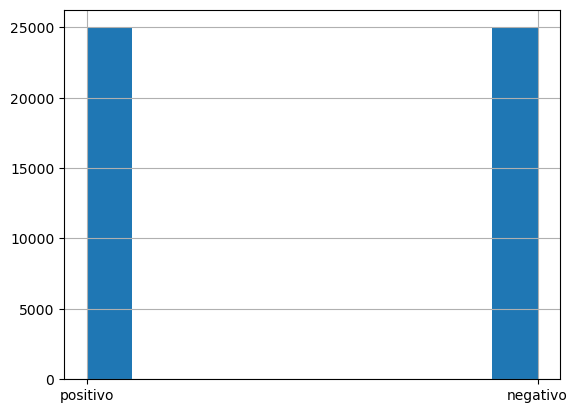

In [51]:
data['sentimiento'].hist()

In [52]:
# Etiquetar los sentimientos (positivo 1, negativo 0)
target_map = {'positivo':1, 'negativo':0}
data['target'] = data['sentimiento'].map(target_map)

In [53]:
data.head()

,sentimiento,review_es,target
0,positivo,Uno de los otros críticos ha mencionado que de...,1
1,positivo,Una pequeña pequeña producción.La técnica de f...,1
2,positivo,Pensé que esta era una manera maravillosa de p...,1
3,negativo,"Básicamente, hay una familia donde un niño peq...",0
4,positivo,"El ""amor en el tiempo"" de Petter Mattei es una...",1


In [54]:
# Dividir el dtaframe en conjunto de entrenamiento y prueba con el método train_test_split
data_train, data_test = train_test_split(data)

In [55]:
# Cantidad de datos de entrenamiento (37500 rows × 3 columns)
data_train

,sentimiento,review_es,target
49055,negativo,Objetivo es la historia de un agente especial ...,0
22170,negativo,"Con un título ""prestado"" de Werner Herzog y la...",0
49168,negativo,"Veamos, personajes de cartón como terroristas ...",0
21191,positivo,Primero vi esta película a mediados de los 80 ...,1
30091,negativo,"Based on the excellent novel, Watchers by Dean...",0
...,...,...,...
36659,negativo,Simplemente no pude terminar esta película.Sin...,0
1539,negativo,El pastel americano ha ido una larga distancia...,0
31979,negativo,Connie Hoffman es muy bonita y está atractivam...,0
26744,negativo,"No me impresionó esta película, especialmente ...",0


In [56]:
# cantidad de datos de prueba (12500 rows × 3 columns)
data_test

,sentimiento,review_es,target
8112,positivo,"Crecí en Royersford, Pa. La ciudad donde era e...",1
16012,negativo,Las películas simplemente no empeoran que esto...,0
13954,negativo,Este reinicio es como una comida procesada de ...,0
28294,positivo,"Vi a esta película hace muchos años, y lo odié...",1
22440,negativo,Sentí que el aluminio rancio era un desperdici...,0
...,...,...,...
46886,positivo,Excelente historia de vidas que necesitan repa...,1
15666,positivo,Este interesante documental cuenta una histori...,1
25981,negativo,Realmente quise gustarme el libro de almohadas...,0
13974,positivo,Los mejores años de nuestras vidas son una pel...,1


In [ ]:
Matrix de entrenamiento

In [57]:
# Vectorización con 2000 dimensiones 
vectorizer = TfidfVectorizer(max_features=2000)

In [59]:
X_train = vectorizer.fit_transform(data_train['review_es'])

In [60]:
X_train

<37500x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 3466688 stored elements in Compressed Sparse Row format>

In [ ]:
Matrix de prueba

In [61]:
X_test = vectorizer.transform(data_test['review_es'])
X_test

<12500x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 1151858 stored elements in Compressed Sparse Row format>

In [62]:
# Crear los Y de entrenamiento y prueba en valores 0 y 1
Y_train = data_train['target']
Y_test = data_test['target']

In [64]:
# se configura el modelo con 1000 iteraciones y se le entrega X y Y de entrenemiento
model = LogisticRegression(max_iter=1000)
model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [65]:
print("Train acc:", model.score(X_train, Y_train))
print("Test acc:", model.score(X_test, Y_test))

Train acc: 0.8796
Test acc: 0.86336


In [66]:
# correr los datos de entrenamiento y prueba
P_train = model.predict(X_train)
P_test = model.predict(X_test)

In [68]:
# Calcular la matrix de confusion 
cm = confusion_matrix(Y_train, P_train, normalize='true')
cm

array([[0.86862913, 0.13137087],
       [0.10946651, 0.89053349]])

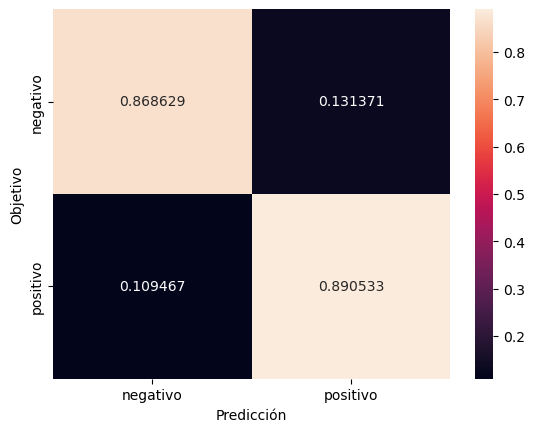

In [69]:
# Graficar la matrix de entrenamiento
def plot_cm(cm):
    classes = ['negativo', 'positivo']
    df_cm = pd.DataFrame(cm, index=classes, columns=classes)
    ax = sn.heatmap(df_cm, annot=True, fmt='g')
    ax.set_xlabel("Predicción")
    ax.set_ylabel("Objetivo")

plot_cm(cm)

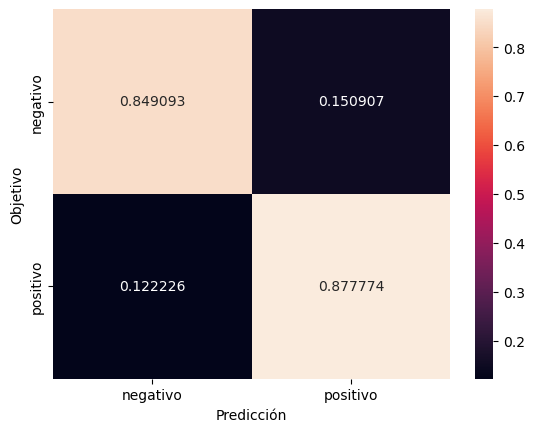

In [70]:
# Graficar la matrix de prueba
cm = confusion_matrix(Y_test, P_test, normalize='true')
plot_cm(cm)

In [71]:
# Maperar las palabras
word_index_map = vectorizer.vocabulary_
word_index_map

{'objetivo': 1282,
 'es': 623,
 'la': 1027,
 'historia': 890,
 'de': 438,
 'un': 1867,
 'agente': 56,
 'especial': 649,
 'que': 1510,
 'después': 481,
 'llevar': 1069,
 'cabo': 234,
 'los': 1081,
 'tenga': 1767,
 'en': 585,
 'cuenta': 412,
 'esta': 667,
 'una': 1868,
 'esas': 625,
 'películas': 1367,
 'para': 1338,
 'chicos': 290,
 'las': 1033,
 'mierda': 1161,
 'regresa': 1552,
 'casa': 270,
 'encontrar': 593,
 'su': 1719,
 'ex': 707,
 'esposa': 664,
 'dos': 542,
 'hijos': 886,
 'están': 692,
 'tomando': 1821,
 'charlie': 286,
 'tiene': 1804,
 'solo': 1697,
 'par': 1337,
 'horas': 901,
 'hacer': 849,
 'lo': 1071,
 'le': 1034,
 'dicen': 491,
 'esto': 682,
 'fue': 778,
 'con': 350,
 'mucho': 1202,
 'peores': 1376,
 'he': 864,
 'visto': 1941,
 'si': 1663,
 'no': 1253,
 'hubiera': 911,
 'sido': 1664,
 'alguien': 70,
 'realidad': 1533,
 'probablemente': 1465,
 'por': 1435,
 'error': 621,
 'tienda': 1803,
 'videos': 1924,
 'nunca': 1279,
 'gigante': 804,
 'basura': 181,
 'comenzar': 331,
 '

In [74]:
# Crea un arreglo donde toma c/u de las palabras u les da un coeficiente que indica si la palabra es positiva o negatica
model.coef_[0]

array([-0.35330229,  1.9468389 ,  0.41409804, ...,  0.55428395,
       -1.56805927, -1.98303558])

In [75]:
corte = 4

print("Palabras más positivas:")
for word, index in word_index_map.items():
    weight = model.coef_[0][index]
    if weight > corte:
        print(word, weight)

Palabras más positivas:
definitivamente 4.11157495312486
encantó 4.986276049740309
brillante 4.020634159570873
hoy 4.076314029239723
excelente 7.705585924790997
perfecto 4.593478108841099
maravillosa 4.513345035640451
excelentes 4.178287121377344
hilarante 4.185212878207918
increíble 4.186186225285991
disfruté 4.465044541236406


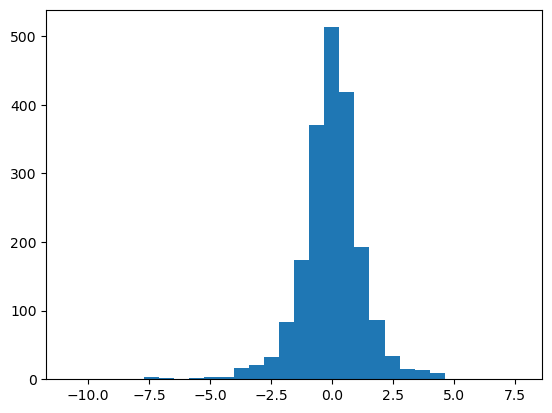

In [76]:
plt.hist(model.coef_[0], bins = 30);

In [77]:
print("Palabras más negativas:")
for word, index in word_index_map.items():
    weight = model.coef_[0][index]
    if weight < -corte:
        print(word, weight)

Palabras más negativas:
peores -7.134963100774824
no -4.356528692894012
basura -4.792973306037615
malo -4.01416881170158
mala -7.285181434067908
peor -10.782524202318859
pobre -5.318589930797683
terrible -7.265079082376983
aburrida -6.939094247191956
minutos -4.216802391182176
mal -5.803720391880778
desafortunadamente -4.681851741378979
predecible -4.213553987371149
horrible -8.8186177857243
aburrido -6.887464719988106
decepción -5.034411845423266
decepcionante -4.7935042037112945


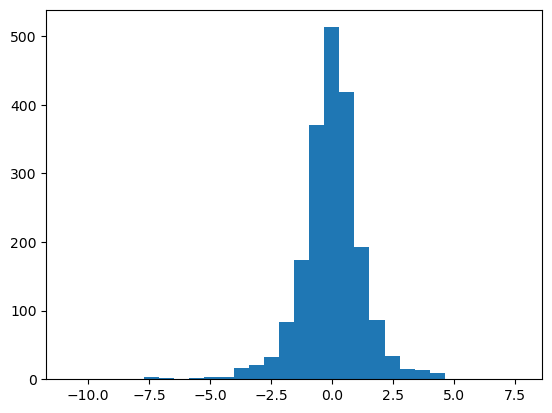

In [78]:
plt.hist(model.coef_[0], bins=30);

In [79]:
prueba = ["estuvo muy entretenida la película", "estuvo terrible la película, me aburrí mucho", "no la recomiendo", "la"]

# Transformar la entrada con el vectorizador
x = vectorizer.transform(prueba)

In [80]:
# Predecir con el modelo
P = model.predict(x)

In [81]:
# Obtener las clases del modelo
clases = model.classes_

In [82]:
# Mostrar la clase predicha
for i in range (len(prueba)):
    if clases[P[i]] == 0:
        print(f"el Comentario: '{prueba[i]}' es: Negativo")
    else:
        print(f"el Comentario: '{prueba[i]}' es: Positivo")

el Comentario: 'estuvo muy entretenida la película' es: Positivo
el Comentario: 'estuvo terrible la película, me aburrí mucho' es: Negativo
el Comentario: 'no la recomiendo' es: Positivo
el Comentario: 'la' es: Positivo
